In [1]:
# 1.导入需要的模块
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from ipywidgets import interact,fixed

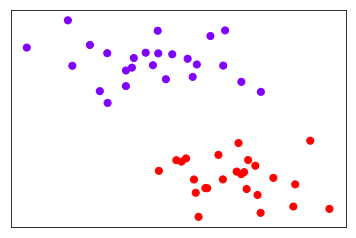

In [2]:
# 2.实例化数据集，可视化数据集
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6) #方差为0.6
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") #c是标签序列
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
plt.xticks([])
plt.yticks([])
plt.show()

'\n#理解函数meshgrid和vstack的作用\na = np.array([1,2,3])\nb = np.array([7,8])\nv1,v2 = np.meshgrid(a,b)\n\n#两两组合，会得到多少个坐标？\n#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)\n\nv1 #array([[1, 2, 3],[1, 2, 3]])\nv2 #array([[7, 7, 7],[8, 8, 8]])\n\nv = np.vstack([v1.ravel(), v2.ravel()])\n#array([[1, 2, 3, 1, 2, 3],\n#       [7, 7, 7, 8, 8, 8]])\n'

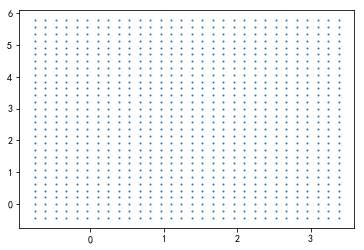

In [4]:
# 3.画决策边界：制作网格，理解函数meshgrid
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

#从坐标向量中返回坐标矩阵
axisy,axisx = np.meshgrid(axisy,axisx)

#使用meshgrid函数将两个一维向量转换为特征矩阵
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

'''
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
v1,v2 = np.meshgrid(a,b)

#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)

v1 #array([[1, 2, 3],[1, 2, 3]])
v2 #array([[7, 7, 7],[8, 8, 8]])

v = np.vstack([v1.ravel(), v2.ravel()])
#array([[1, 2, 3, 1, 2, 3],
#       [7, 7, 7, 8, 8, 8]])
'''

In [5]:
# 4.建模，计算决策边界并找出网格上每个点到决策边界的距离
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

(-0.43660961990940284, 5.772756283035797)

In [6]:
# 5.将绘图过程包装成函数
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

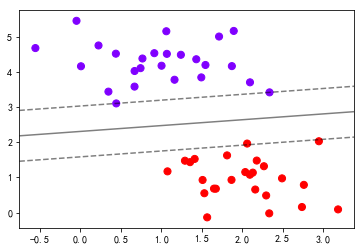

In [7]:
# 6.绘图
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [8]:
# 7.探索模型
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples
print(clf.predict(X)) #[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0]
print()

#返回给定测试数据和标签的平均准确度
print(clf.score(X,y)) #1.0
print()

#返回支持向量
print(clf.support_vectors_)
'''
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
'''
print()

#返回每个类中支持向量的个数
print(clf.n_support_) #[2 1]

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]

1.0

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]

[2 1]


(100, 2)
(100,)


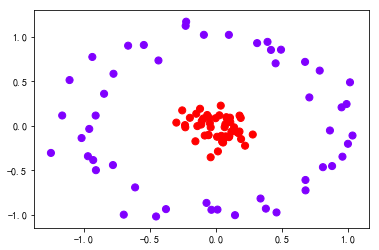

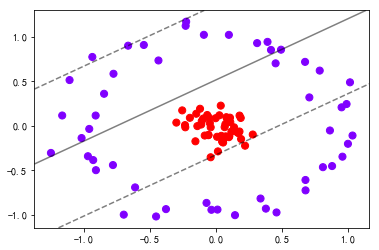

In [9]:
# 8.推广到非线性情况
X,y = make_circles(100, factor=0.1, noise=.1)
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


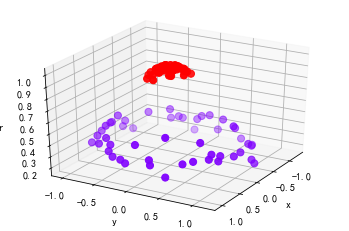

In [10]:
# 9.为非线性数据增加维度并绘制3D图像
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)
from mpl_toolkits import mplot3d
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


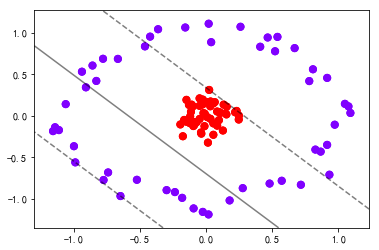

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

In [11]:
# 10.将上述过程具体运行
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()